## importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## loading the dataset

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory Data Analysis

1. find corelation between all the features
2. plot heat map
3. based on correlation find the best values (sort the corelation of output values in descending order)


In [ ]:
numeric_df=df.select_dtypes(include=['float','int'])
numeric_df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

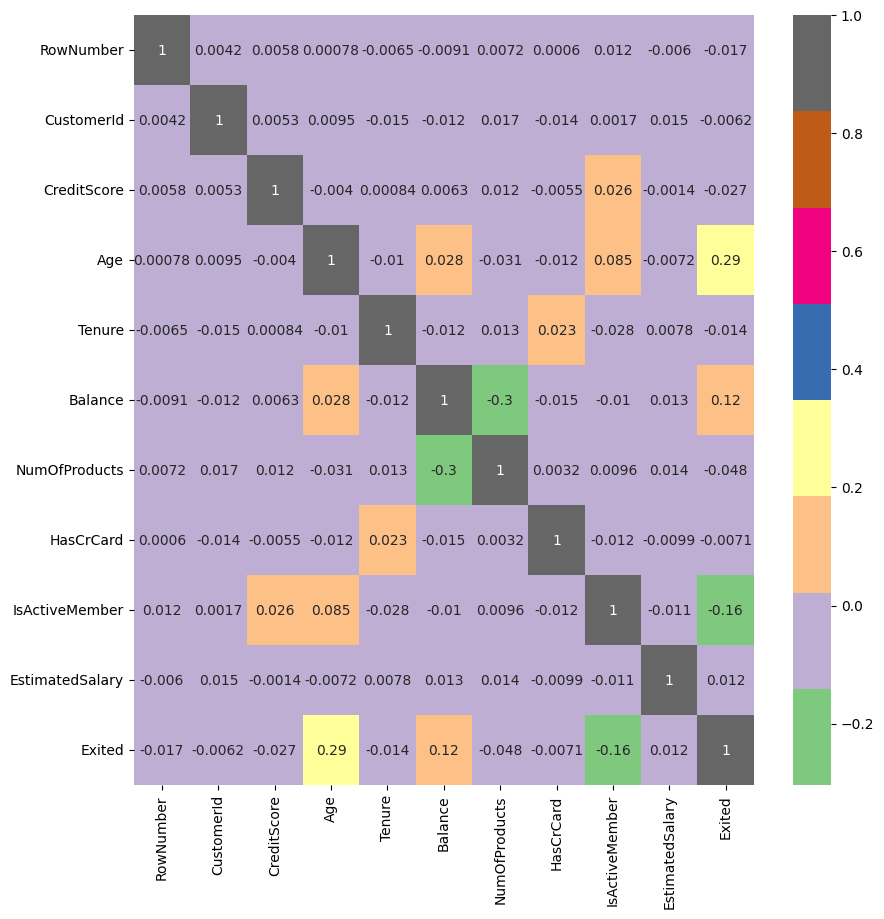

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(),annot =True ,cmap='Accent')


In [ ]:
corr=numeric_df.corr()

best_features=corr['Exited'].sort_values(ascending=False)[1:]
best_features

,Exited
Age,0.285323
Balance,0.118533
EstimatedSalary,0.012097
CustomerId,-0.006248
HasCrCard,-0.007138
Tenure,-0.014001
RowNumber,-0.016571
CreditScore,-0.027094
NumOfProducts,-0.047820
IsActiveMember,-0.156128


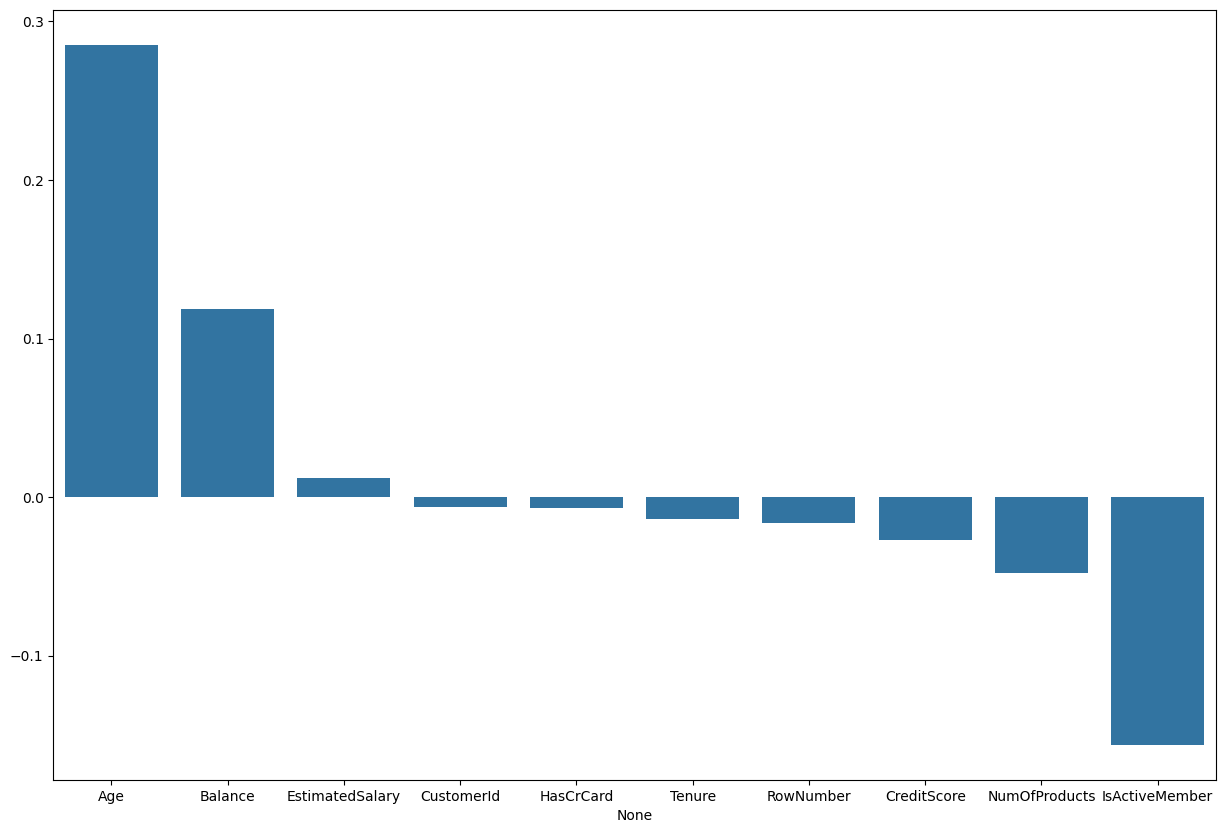

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=best_features.index,y=best_features.values)
# plt.xticks(rotation=90)
plt.show()

## Data Analysis

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


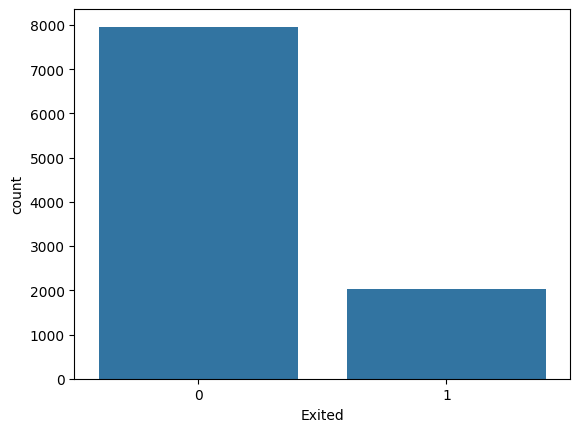

In [ ]:
df['Exited'].value_counts()


sns.countplot(x='Exited',data=df)
plt.show()

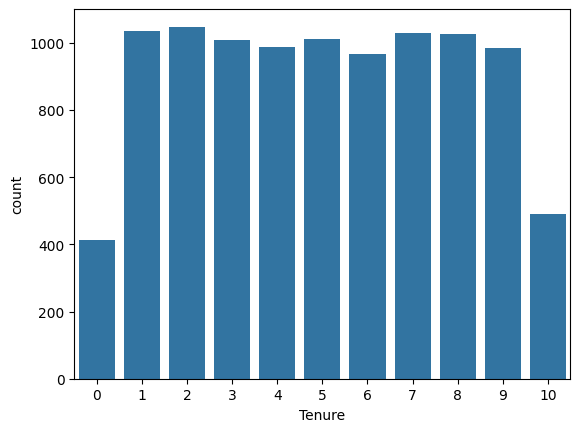

In [ ]:
df['Tenure'].value_counts()


sns.countplot(x='Tenure',data=df)
plt.show()

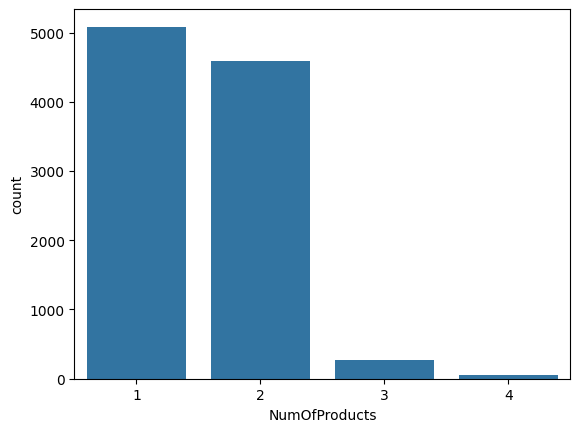

In [ ]:
df['NumOfProducts'].value_counts()


sns.countplot(x='NumOfProducts',data=df)
plt.show()

# Finding Relations

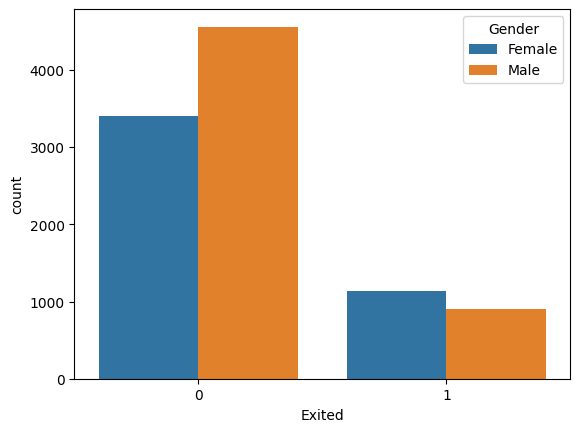

In [ ]:

sns.countplot(x='Exited',data=df,hue='Gender')
plt.show()

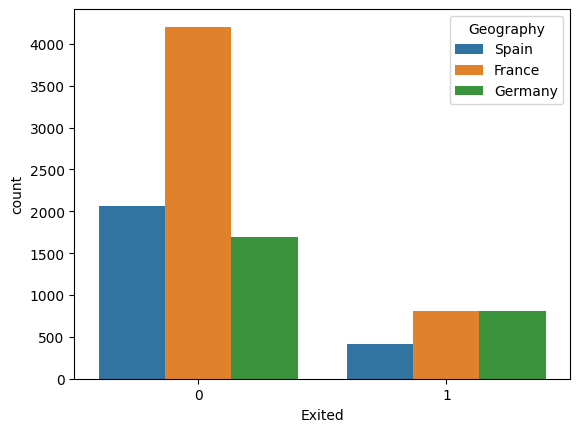

In [ ]:

sns.countplot(x='Exited',data=df,hue='Geography')
plt.show()

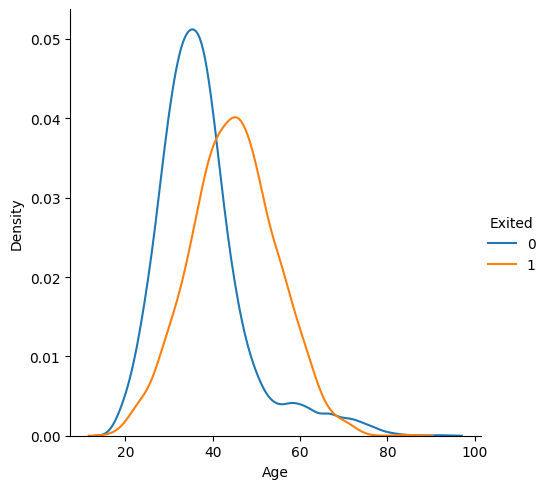

In [ ]:
sns.FacetGrid(df,hue='Exited',height=5).map(sns.kdeplot,'Age').add_legend()
plt.show()

# Data preprocessing

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)


In [ ]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df['Geography']=df['Geography'].map({'France':0,'Germany':1,'Spain':2})

In [ ]:
df['Gender']=np.where(df['Gender']=='Female',0,1)
df['Geography']=df['Geography'].astype('category').cat.codes

In [ ]:
x=df.drop(columns=['Exited'],axis=1)
y=df['Exited']

In [ ]:
x.shape

(10000, 10)

In [ ]:
y.shape

(10000,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score


In [ ]:
lr_model=LogisticRegression()
xg_model=XGBClassifier()

lr_model.fit(x_train,y_train)
xg_model.fit(x_train,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Evaluation Metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def evaluate_model(model,x_train,x_test,y_train,y_test):
  print("training accuracy",model.score(x_train,y_train))
  print("testing accuracy",model.score(x_test,y_test))

  pred=model.predict(x_test)

  print("confusion matrix")
  cm=confusion_matrix(pred,y_test)
  plt.figure(figsize=(10,10))
  sns.heatmap(cm,annot=True,fmt=".2f")
  plt.show()

  print("classification report")
  print(classification_report(pred,y_test))
  print("f1_score",f1_score(pred,y_test))



training accuracy 0.78725
testing accuracy 0.8005
confusion matrix


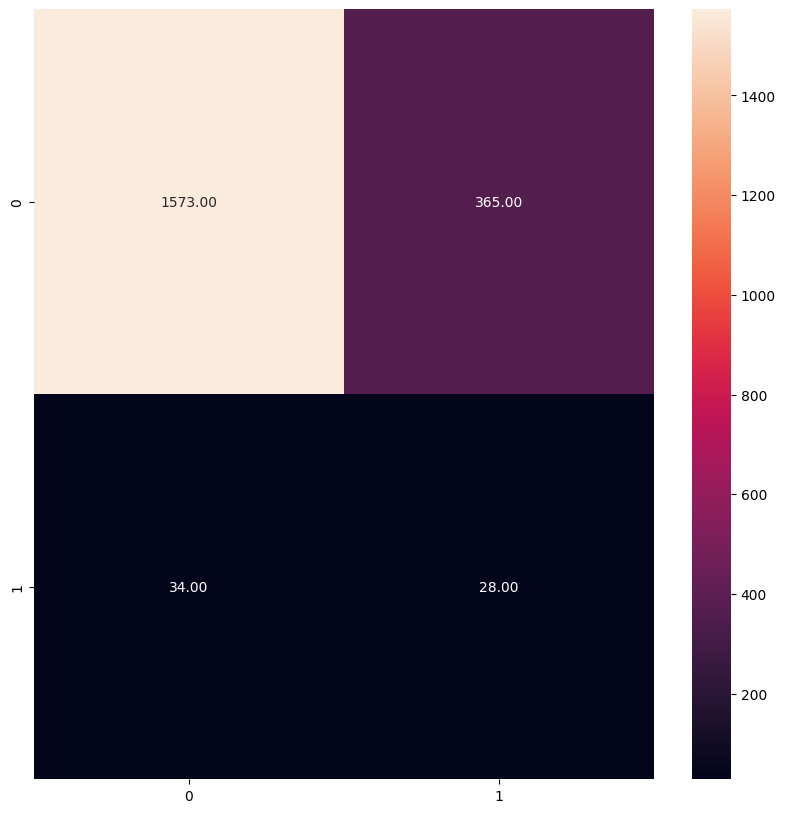

classification report
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1938
           1       0.07      0.45      0.12        62

    accuracy                           0.80      2000
   macro avg       0.53      0.63      0.51      2000
weighted avg       0.95      0.80      0.86      2000

f1_score 0.12307692307692307


In [ ]:
evaluate_model(lr_model,x_train,x_test,y_train,y_test)

training accuracy 0.954625
testing accuracy 0.856
confusion matrix


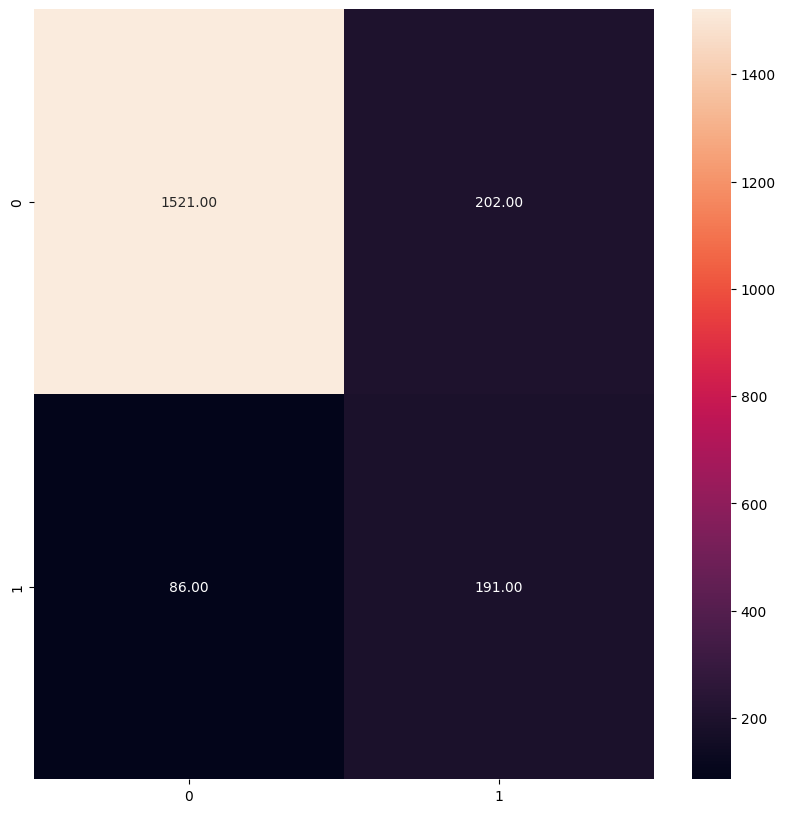

classification report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1723
           1       0.49      0.69      0.57       277

    accuracy                           0.86      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.88      0.86      0.87      2000

f1_score 0.5701492537313433


In [ ]:
evaluate_model(xg_model,x_train,x_test,y_train,y_test)

# Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_hyperparameters={'n_estimaters':[100,200],'learning_rate':[0.01,0.05,0.1],'max_depth':[3,4,5]}

In [ ]:
grid=GridSearchCV(XGBClassifier(),xgb_hyperparameters,cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimaters': [100, 200]})

In [ ]:
print("Best_score",grid.best_score_)
print("Best_params",grid.best_params_)

Best_score 0.8633750000000001
Best_params {'learning_rate': 0.1, 'max_depth': 4, 'n_estimaters': 100}


In [ ]:
xg_best_model=XGBClassifier(learning_rate=0.1,max_depth=4,n_estimators=100)

xg_best_model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

training accuracy 0.877125
testing accuracy 0.866
confusion matrix


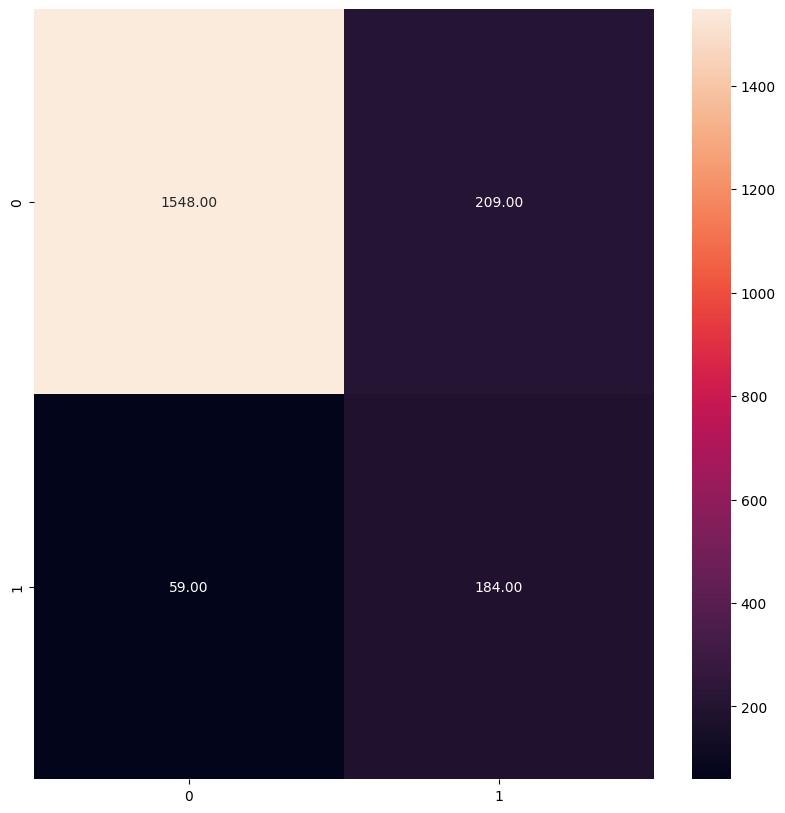

classification report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1757
           1       0.47      0.76      0.58       243

    accuracy                           0.87      2000
   macro avg       0.72      0.82      0.75      2000
weighted avg       0.90      0.87      0.88      2000

f1_score 0.5786163522012578


In [ ]:
evaluate_model(xg_best_model,x_train,x_test,y_train,y_test)